# Tarea 9

Fecha de entrega: 14/Septiembre/2017

Por _Diana López Angeles_

### Ejercicio 2

Utiliza tu función `derivadaNumerica` para
calcular la derivada de la función $\cos$ en un punto
$x_0\in[0,1)$. Compara tu resultado con el que indica el
cálculo exacto. Utiliza valores de $h$ cada vez más pequeños, grafica el comportamiento de la derivada y muestra como converge al valor exacto conforme tomamos $h$ cada vez más pequeño. Para ello pueden graficar el resultado de la derivada numérica contra $1/h$.
Observa el resultado de la aproximación y comenta. ¿El error es del orden de $h$?

In [1]:
using PyPlot

In [2]:
function f(x);                      #La función a la que queremos derivar y evaluar.
    cos(x)
end;

In [45]:
function derivada_numerica(f,x,h)     #Definimos nuestra funcion que tenga de inputs la funcion, el punto donde queremos evaluarla y h.
    df_ = (f(h+x)-f(x))/h             #La definicion de derivada.
    return df_                        #Que nos de nuestra derivada evaluada en el punto.
end;

In [46]:
derivada_numerica(cos,.2,0.01)         #Probamos nuestra función y vemos que funciona.

-0.2035663117093356

In [47]:
derivada_numerica(cos,.2,0.0001)       #Aquí vemos que en efecto conforme h se hace más pequeña tambien el error.

-0.1987183337925913

In [111]:
#Esta función para graficar la hemos estado usando mucho para otras tareas, solo hay que modificar lo que queremos obtener y algunos inputs pero funciona de la misma manera:

function grafica_convergencia(f,x,h)                            #Definimos la funcion con los inputs.
    lista_h = collect(h)                                        #Que recoga los valores de h que le vamos a dar en una lista, lo usaremos más tarde en nuestro ciclo for.
    lista_derivada_numerica = []                                #Una lista vacia para poder guardar los datos que obtengamos en el ciclo for.
    O =0.0                                                     #Una variable cualquiera igualada a cero que usaremos en el ciclo for.
    for i in 1:length(lista_h)
        O= derivada_numerica(f,x,lista_h[i])                   #Usando nuestra función del ejercicio 1.
        push!(lista_derivada_numerica,O)
    end;
    
    #Le ponemos que es cada eje y el titulo de la grafica, le decimos que graficar y finalmente que lo muestre.
    
    xlabel("1/h")
    ylabel("Valor de la derivada numerica")
    title("Convergencia al valor exacto de la derivada")
    plot(1/h,lista_derivada_numerica, label = "Derivada numerica")
    legend()
    show()
end;

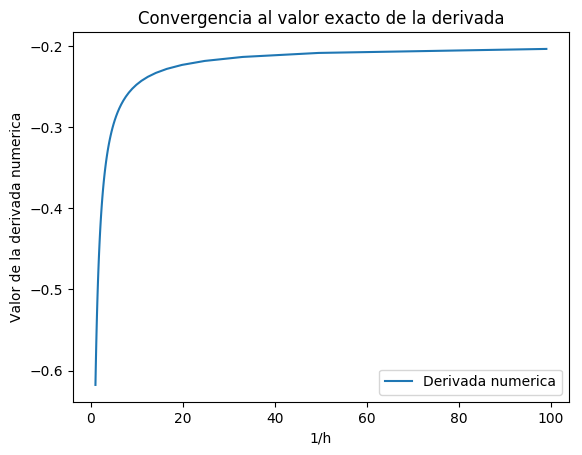

In [112]:
grafica_convergencia(f,.2,linspace(0,1,100))    #Para que nos de la grafica.

##### De esta grafica podemos notar que conforme h es más pequeña más se acerca al valor real de la derivada.

In [8]:
function error_relativo(f,x,h,der_real)
    error = abs((derivada_numerica(f,x,h)-der_real)/der_real)  #Aqui se hace el procedimiento para obtener el error.
    return error
end;

In [9]:
-sin(.2)             #El valor real de la derivada de cos evaluada en el punto x=0.2

-0.19866933079506122

In [10]:
error_relativo(f,.2,1,-0.19866933079506122) #Usamos el valor real de la derivada calculado previamente, en la celda de arriba.

2.109230905910535

In [96]:
#El procedimiento de esta función para graficar es similar a la de convergencia 

function grafica_error_relativo(f,x,h,der_real)
    lista_h = collect(h)
    lista_error = []
    O = 0.0 
    for i in 1:length(lista_h)
        O = error_relativo(f,x,lista_h[i],der_real)
        push!(lista_error,O)
    end
    title("Error absoluto relativo de la derivada en función de h")
    xlabel("h")
    ylabel("Error absoluto relativo")
    plot(h,lista_error,color="#7b68ee", label= "Error")
    legend()
    show()
end;

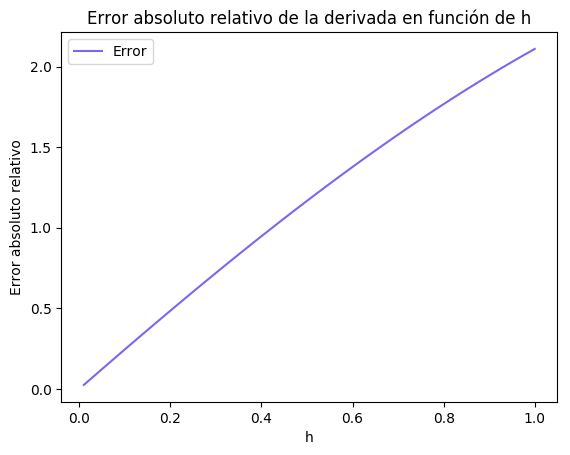

In [97]:
grafica_error_relativo(f,0.2,linspace(0,1,100),-0.19866933079506122)

###### Aqui podemos ver que conforme h es más pequeña el error de la derivada tiende a cero. Como obtuvimos una recta podemos decir que el error es de orden h.

### Ejercicio 3

Teniendo en mente la serie de Taylor para $f(x+h)$ ¿existe
alguna forma de mejorar esta definición? Comenta.

__Tip:__ ¿Que pasa con los términos pares de la serie cuando la calculamos para $f(x-h)$?, ¿Como podemos despejar la derivada exacta de $f$ combinando ambas series? 

La expansión de la serie de Taylor de $f(x+h)$ alrededor de $h=0$:

$$
f(x+h)=f{\left (x \right )} + h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Calculamos la expansión de la serie de Taylor para $f(x-h)$ alrededor de $h=0$:

$$
f(x-h)=f{\left (x \right )} - h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \frac{h^{2}}{2} \left. \frac{d^{2}}{d \xi^{2}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} - \frac{h^{3}}{6} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }} + \mathcal{O}\left(h^{4}\right)
$$

Ahora restamos $f(x+h)-f(x-h)$:

$$
f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \frac{h^{3}}{3} \left. \frac{d^{3}}{d \xi^{3}}  f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{5}\right)
$$

Tomando solo hasta el término de la derivada:

$$
f(x+h)-f(x-h)=2h \left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}+ \mathcal{O}\left(h^{3}\right)
$$

Sabemos que: 

$$
\Delta f(x,h)=f(x+h)-f(x)
$$

Luego:

$$
f'(x)=\left. \frac{d}{d \xi} f{\left (\xi \right )} \right|_{\substack{ \xi=x }}
$$

Entonces nos queda:

$$
\Delta f(x,h)=2h f'(x)+ \mathcal{O}\left(h^{3}\right)
$$

Finalmente despejando tenemos que:

$$
\frac{\Delta f(x,h)}{2h}-f'(x)=\mathcal{O}\left(h^{2}\right)
$$

### Ejercicio 4
Implementa la _derivada
simétrica_ en `Julia` como `derivada_Simetrica` y repite la
comparativa que realizaste en el __ejercicio 2__.

In [13]:
function derivada_simetrica(f,x,h)
    df_ = (f(h+x)-f(x-h))/2h           #La definicion de derivada simetrica
    return df_                         #Que nos de nuestra derivada evaluada en el punto.
    end;

In [14]:
derivada_simetrica(f,0.2,0.01)        #Vemos que la aproximacion a la derivada es muchisimo mejor que la de derivada númerica.

-0.19866601965610187

In [107]:
#Lo mismo que las funciones de graficar del ejercicio 2:

function grafica_convergencia_simetrica(f,x,h)
    lista_h = collect(h)
    lista_derivada_simetrica = []
    r = 0.0 
    for i in 1:length(lista_h)
        r = derivada_simetrica(f,x,lista_h[i])
        push!(lista_derivada_simetrica,r)
    end;
    xlabel("h")
    title("Convergencia al valor exacto de la derivada")
    plot(h,lista_derivada_simetrica, label= "Derivada simetrica")
    plot(-sin.(0),0)
    show()
    legend()
end;

In [108]:
#Lo mismo que cuando calculamos el error en el ejercicio 2:

function error_relativo_simetrica(f,x,h,der_real)
    error = abs((derivada_simetrica(f,x,h)-der_real)/der_real)  #Aqui se hace el procedimiento para obtener el error.
    return error
end;

In [109]:
#Lo mismo que la funcion de graficar error en el ejercicio 2:

function grafica_error_relativo_simetrica(f,x,h,der_real)
    lista_h = collect(h)
    lista_error = []
    O = 0.0 
    for i in 1:length(lista_h)
        O = error_relativo_simetrica(f,x,lista_h[i],der_real)
        push!(lista_error,O)
    end
    title("Error absoluto relativo de la derivada en función de h")
    xlabel("h")
    plot(lista_h,lista_error,color="#7b68ee", label = "Error")
    legend()
    show()
end;

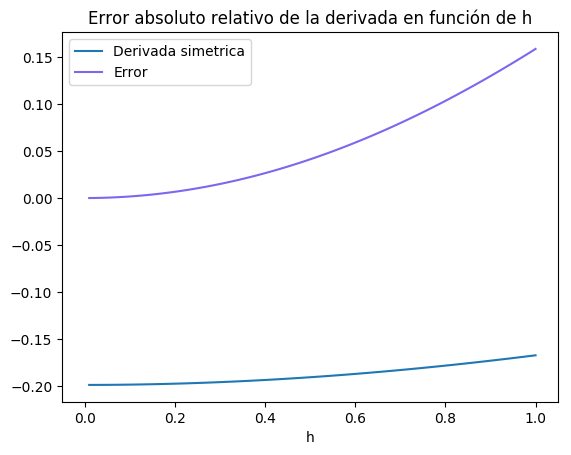

In [110]:
grafica_convergencia_simetrica(f,.2,linspace(0,1,100))            #Para que nos de la grafica.
grafica_error_relativo_simetrica(f,.2,linspace(0,1,100),-0.19866933079506122)

#### Aqui podemos ver que a diferencia de la aproximacion derivada_numerica, en el error tenemos una parabola en vez de una "recta", eso quiere decir que conforme h es m{as pequeña el error decae más rapido en el metodo derivada_simetrica. Y para la convergencia de la derivada vemos que esta tambien converge muchisimo más rapido que la del ejericicio 2.

### Ejercicio 5

Demuestre que $\Delta_h$ es un operador lineal y que podemos "factorizar" la función a la derecha del operador. Hecho esto podemos quitar de ambos lados la función $f$ para obtener lo siguiente:
$$\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$$

Un operador lineal cumple con dos propiedades, la aditiva y de homogeneidad. Entonces, sean dos funciones $f$ y $g$ y $\alpha$ es un escalar. Tenemos:

$$
\Delta_{h} (\alpha f +g) = \alpha \Delta_{h}(f) +\Delta_{h}(g)
$$ 

$$
\Delta_{h}(\alpha f +g) = \sum_{n = 1}^{\infty} \frac{h^n}{n!} \frac{d^n(\alpha f +g)}{dx^n}
$$

Usando la linealidad del operador derivada 

$$ \Delta_{h}(\alpha f +g) = \sum_{n = 1}^{\infty} \frac{h^n}{n!}\left[\alpha \frac{d^n f}{dx^2} +\frac{d^n g}{dx^2}\right]$$

Distributividad

$$\Delta_{h}(\alpha f +g) = \sum_{n = 1}^{\infty} \left[\alpha\frac{h^n}{n!}\frac{d^n f}{dx^2} + \frac{h^n}{n!} \frac{d^n g}{dx^2}\right]$$

Usando la linealidad del operador suma 

$$ \Delta_{h}(\alpha f +g) = \alpha \sum_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n f}{dx^2} +\sum_{n = 1}^{\infty} \frac{h^n}{n!}\frac{d^n g}{dx^2}$$

$$\Delta_{h}(\alpha f +g) = \alpha \Delta_{h}(f) +\Delta_{h}(g)$$

### Ejercicio 6

Para saber como se relaciona el _operador derivada exacta_ con el _operador diferencia finita hacia adelante_ es necesario invertir la serie $\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h^n\left.\frac{d^n}{d\xi^n}\right|_{\substack{ \xi=x }}$. Una forma directa de hacerlo es identificar la función para la cual es esa serie. Entonces, pensando en el operador derivada como un número, la serie se identifica como función evaluada en $\left. h\frac{d}{d_\xi}\right|_{\substack{ \xi=x }}$, ¿cual es esa función?. Si llamamos $\phi$ a dicha función, deberiamos de tener una relación de la siguiente forma:
$$\Delta_h=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)$$.
    
* __Nota:__ En la clase se demostró que $\phi(x)=e^x-1$, escriba el razonamiento en $\LaTeX$ de como se llegó a esto.

La serie de Taylor para la función exponencial es:
$$
e^x=\sum_{n=0}^{\infty} \frac{x^n}{n!}=1+\sum_{n=1}^{\infty} \frac{x^n}{n!}
$$
Entonces, al evaluar la exponencial en $h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}$ tendriamos:

$$
e^{h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}}=\sum_{n=0}^{\infty} \frac{1}{n!}h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}=1+\sum_{n=1}^{\infty} \frac{1}{n!}h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}
$$

Despejando $\Delta_h$:

$$
\Delta_h=\sum_{n=1}^{\infty} \frac{1}{n!}h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}=e^{h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}}-1=\phi\left(h\left.\frac{d}{d\xi}\right|_{\substack{ \xi=x }}\right)
$$

Finalmente:
$$
\phi(x)=e^x-1
$$